# Neuronale Netze zur Dokumentenklassifikation mit Keras

## Daniel Ringler

## Ancud IT-Beratung: [ancud.de](https://ancud.de)

![ancud](img/ancud_website.png)

### This talk: [https://git.io/fx0Bw](https://git.io/fx0Bw)
[https://github.com/dringler/talks/blob/master/data-analytics-2018/dl-keras.ipynb](https://github.com/dringler/talks/blob/master/data-analytics-2018/dl-keras.ipynb) 


(based on Adrin Jalali's talk https://github.com/adrinjalali/2017-05-talk-dl)

### Requirements: conda, python3, ipython, jupyter notebook

# Neural Networks


## Human Brain

![human NN](img/biological_NN.png)

## Artificial Neural Networks
* *"[A logical calculus of the ideas imminent in nervous activity](http://aiplaybook.a16z.com/reference-material/mcculloch-pitts-1943-neural-networks.pdf)"* by Warren S. McCulloch and Walter Pitts (1943)
* computational model based on the brain
* parallel processing of input through a network of nodes
* complex **adaptive** system: ability to *learn* by adjusting the *weights*
* errors alter the weights to improve the results
* **neurons:** read and process input, generate output
* strategies for learning:
    * **supvervised:** labeled training data
    * **unsupervised:** cost function to be minimized
    * **reinforcement:** learn by observation (with agent simulated data)
    
![artificial NN](img/artificial_NN.png)

### Perceptron
* linear binary classifier
* Simplest neural network with a single neuron (by [Rosenblatt, 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf))
    * One or more inputs with weights
    * Processor with **activation function**
    * Single output
* Feed forward model: from left to right (non-cyclical)

![perceptron](img/perceptron_weights.png)

### Activation functions
scale output to acceptable range before passing it to the next layer
#### Logistic (Sigmoid)
$$ f(x) = \dfrac{1}{1 + e^{-x}} $$

#### Softsign
$$ f(x) = \dfrac{x}{1+ |x|} $$

#### ReLU (Rectified linear unit)
$$ f(x) = \begin{cases}
    0 & \text{for } x < 0 \\
    x & \text{for } x \geq 0
  \end{cases} $$

#### ...

[more activation functions](https://en.wikipedia.org/wiki/Activation_function)


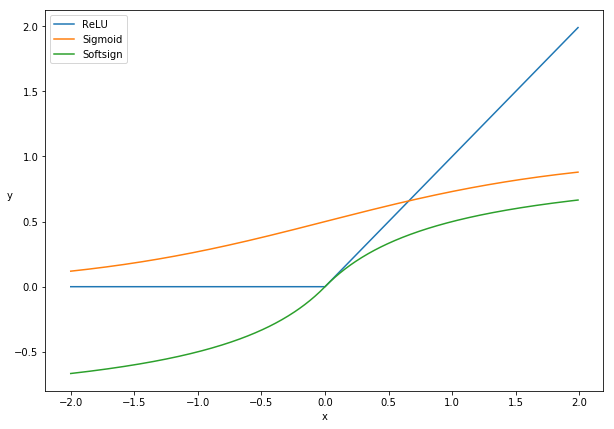

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-2, 2, 0.01)

def relu(x):
    return max(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softsign(x):
    return x / (1 + np.absolute(x))

plt.figure(figsize = (10,7))
plt.plot(X, [relu(x) for x in X])
plt.plot(X, [sigmoid(x) for x in X])
plt.plot(X, [softsign(x) for x in X])

plt.xlabel("x")
plt.ylabel("y").set_rotation(0)
plt.legend(['ReLU', 'Sigmoid', 'Softsign'])

plt.show()

### Perceptron (continued)
![perceptron](img/perceptron_weights.png)

#### Adding Bias to the Perceptron
![perceptron](img/perceptron_weights_bias.png)


#### Example
![perceptron example](img/perceptron_example.png)


### Linearly separable problems

#### Linearly separable vs non-linearly separable data
![linearly separable](img/linearly-separable.png)

#### AND & OR
![and & or](img/and-or.png)

#### XOR
![xor](img/xor.png)

#### Multi-layered perceptron
A network of many neurons
![multi-layered perceptron](img/multi-layered-perceptron.png)


Source: The Nature of Code by Daniel Shiffman: https://natureofcode.com/book/chapter-10-neural-networks/

## Backpropagation
* optimizing weights of a multi-layered network
* fed error backwards through the network and adjust weights
* calculates the gradient of the loss function
* uses activation function

### Iterative (supervised) Approach
![iterative training](img/iterative-training.png)

### Gradient Descent
optimization algorithm for finding local minima of functions 

![loss vs weight](img/loss_1.png)

![starting point](img/loss_2.png)

![negative gradient](img/loss_3.png)

![gradient step](img/loss_4.png)

#### Learning Rate

![too small learning rate](img/loss_la_1.png)

![too large learning rate](img/loss_la_2.png)

![good learning rate](img/loss_la_3.png)




Source: [Google Machine Learning Crash Course](https://developers.google.cn/machine-learning/crash-course/reducing-loss/an-iterative-approach)

## Neural Network Architectures
### Feedforward NN
![feedforward](img/feedforward-nn.png)
[Source](https://en.wikipedia.org/wiki/Artificial_neural_network#/media/File:Colored_neural_network.svg)

### Recurrent NN
* connections form a directed cycle
![unrolled RNN](img/RNN-unrolled.png)
[Source](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

#### Elman SRN (simple RN)
* three-layer network with additional context units (u) to maintain a state
* used for sequence-prediction
![Elman SRNN](img/Elman_srnn.png)
[Source](https://en.wikipedia.org/wiki/Recurrent_neural_network#/media/File:Elman_srnn.png)


#### LSTM (Long short-term memory)
* learn from & act upon time-related data
* undefined length of time between events of relevance
![LSTM](img/lstm.png)
[Source](https://en.wikipedia.org/wiki/Long_short-term_memory#/media/File:Peephole_Long_Short-Term_Memory.svg)

### Convolutional NN
for spatial data (images, sound, text(?))

![cnn](img/cnn.png)
* **Convolutional layer:** filters that activate for specific features at some spatial position
    * **filter/kernel:** matrix of weights that slides over the input performing elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.
* **Activation function** (e.g. ReLu)

![convolution](img/convolution.gif)


In [2]:
import numpy as np

identity_filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_detection_filter = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
example_filter = np.array([[0, 1, 2], [2, 2, 0], [0, 1, 2]])

print("identify filter\n{}\n".format(identity_filter))
print("edge detection filter\n{}\n".format(edge_detection_filter))
print("example filter (see below)\n{}\n".format(example_filter))

identify filter
[[0 0 0]
 [0 1 0]
 [0 0 0]]

edge detection filter
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]

example filter (see below)
[[0 1 2]
 [2 2 0]
 [0 1 2]]



![standard-convolution](img/standard-convolution.gif)

* **Padding:** extra "fake" pixels at the edge of the input image
![padding](img/cnn-padding.gif)

<!--#### A collection of Kernels
* **channel:** a "view" of the image (e.g. three channels for RBG)
* **filter:** a collection of kernels for a channel
![filter](img/cnn-filter.png)
![filters](img/cnn-filters.gif)
-->

* **Pooling layer**
    * **pooling/subsampling layer:** to reduce the size and avoid overfitting (e.g. max pooling)
        * **striding**: skip while sliding
stride 2 convolution
![striding](img/cnn-striding.gif)
Max pooling with a 2x2 filter and stride = 2
![max_pooling](img/max_pooling.png)

<!--![pooling](img/cnn-pooling.gif)-->


<!--### Adding Bias
![bias](img/cnn-bias.gif)-->


* **Fully-connected layer:** last layer for voting


**CNN Sources:**
* [theano tutorial](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)
* [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
* [Stanford CNN class](http://cs231n.github.io/convolutional-networks/)



## New developments
### CPU vs GPU processing
![CPU vs GPU](img/cpu_gpu.png)
[Source](https://www.frontiersin.org/articles/10.3389/fgene.2013.00266/full)

### Better algorithms
#### Advances in computer vision
* [Rapid object detection using a boosted cascade of simple features](http://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf), 2001
* [Distinctive Image Features from Scale-Invariant Keypoints](https://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf), 2004

#### Deep belief networks
* [A fast learning algorithm for deep belief nets](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf), 2006
* [Convolutional Deep Belief Networks for Scalable Unsupervised Learning of Hierarchical Representations](https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf), 2009

#### CNN
* [Flexible, High Performance Convolutional Neural Networks for Image Classification](http://people.idsia.ch/~juergen/ijcai2011.pdf), 2011
* [ImageNet Classification with Deep Convolutional Neural Networks](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), 2012

# [Keras](https://keras.io/)

![keras](img/keras.png)

### [Keras 4 Step Workflow](https://www.kdnuggets.com/2018/06/keras-4-step-workflow.html)

![keras-workflow](img/keras-4-step-workflow.png)

 1. **Define training data:** load, clean, preprocess
 2. **Define NN model:** using the sequential model class or functional API in Keras
    * Sequential: linear stack of networks layers
    * Functional API: flexibel approach for more complex models (e.g. multi-input, multi-output, or graph models)
 3. **Configure learning process:** *compile()* method
    * optimizer, loss function, list of metrics in sequential model class
    * optimizer, loss function, loss weights for functional API
 4. **Train model:** *fit()* method 
    * input and target tensors


### create a virtual environment with conda for keras

 conda create -n keras_env [nb_conda](https://github.com/Anaconda-Platform/nb_conda) [keras](https://github.com/keras-team/keras)
 
* with nb_conda the created virtual environment can be selected as a kernel in the jupyter notebook
* keras will also install all required packages such as tensorflow automatically

In [3]:
#https://github.com/keras-team/keras/blob/master/examples/reuters_mlp.py
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 32
epochs = 5

print('Loading data...')
(x_train_data, y_train_data), (x_test_data, y_test_data) = reuters.load_data(num_words=max_words,
                                                                             #num_words=None,
                                                                             skip_top=0,
                                                                             maxlen=None,
                                                                             test_split=0.2,
                                                                             seed=113,
                                                                             start_char=1,
                                                                             oov_char=2,
                                                                             index_from=3)
print(len(x_train_data), 'train sequences')
print(len(x_test_data), 'test sequences')

num_classes = np.max(y_train_data) + 1
print(num_classes, 'classes')

Using TensorFlow backend.


Loading data...
8982 train sequences
2246 test sequences
46 classes


In [4]:
print(x_train_data[23])

[1, 245, 273, 397, 124, 53, 191, 26, 14, 83, 26, 39, 32, 32, 11, 14, 19, 12, 11, 88, 279, 59, 11, 14, 472, 59, 11, 17, 12]


In [5]:
# Get word to index mapping
word_index = reuters.get_word_index()
word_index['the']

1

In [6]:
# Reverse mapping: index to word
index_word = {i: w for w, i in word_index.items()} 
index_word[1]

'the'

In [7]:
print([index_word[i] for i in x_train_data[23]])

['the', 'federal', 'gain', 'development', 'foreign', 'lt', 'any', 'year', 'reuter', 'revs', 'year', 'an', 'billion', 'billion', 'vs', 'reuter', 'from', 'dlrs', 'vs', 'may', 'reserves', 'were', 'vs', 'reuter', 'point', 'were', 'vs', 'pct', 'dlrs']


In [8]:
print('Vectorizing sequence data with {} words to one hot encoding...'.format(max_words))
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train_data, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test_data, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data with 1000 words to one hot encoding...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [9]:
x_train[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train_data, num_classes)
y_test = keras.utils.to_categorical(y_test_data, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
print('Defining model...')
model = Sequential()
# input layer
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print("Defining learning process...")
model.compile(loss='categorical_crossentropy', #mean_squared_error
              optimizer='adam',
              metrics=['accuracy'])
model

Defining model...
Defining learning process...


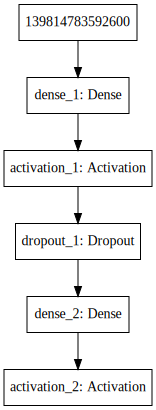

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# graphviz and pydot required
# sudo apt-get install python-pydot python-pydot-ng graphviz

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
print("Training model...")
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

print("Evaluating model...")
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

# model.metrics_names
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training model...
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 195us/step - loss: 1.4291 - acc: 0.6782 - val_loss: 1.0909 - val_acc: 0.7664
Epoch 2/5
8083/8083 [==============================] - 1s 177us/step - loss: 0.7887 - acc: 0.8169 - val_loss: 0.9400 - val_acc: 0.7920
Epoch 3/5
8083/8083 [==============================] - 1s 171us/step - loss: 0.5502 - acc: 0.8654 - val_loss: 0.8919 - val_acc: 0.7976
Epoch 4/5
8083/8083 [==============================] - 1s 170us/step - loss: 0.4163 - acc: 0.9004 - val_loss: 0.8797 - val_acc: 0.8098
Epoch 5/5
8083/8083 [==============================] - 1s 169us/step - loss: 0.3247 - acc: 0.9183 - val_loss: 0.9139 - val_acc: 0.7909
Evaluating model...
2246/2246 [==============================] - 0s 30us/step
Test loss: 0.8884014036649057
Test accuracy: 0.7929652715939448


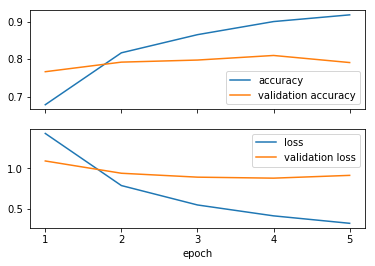

In [15]:
import matplotlib.pyplot as plt

X = [e+1 for e in history.epoch]

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(X, history.history['acc'], label='accuracy')
ax1.plot(X, history.history['val_acc'], label='validation accuracy')
ax1.legend()

ax2.plot(X, history.history['loss'], label='loss')
ax2.plot(X, history.history['val_loss'], label='validation loss')
ax2.legend()

plt.locator_params(axis='x', nbins=max(X))  # x ticks
plt.xlabel('epoch')

plt.show()

In [16]:
p = model.predict(x_test)
p[0]

array([3.5174417e-06, 4.9233072e-06, 6.9495464e-08, 9.8019618e-01,
       1.8573077e-02, 5.5690745e-09, 3.9358346e-07, 6.2490799e-06,
       2.6724016e-04, 1.5675696e-06, 1.9509648e-06, 2.5216454e-05,
       9.0366223e-07, 4.0865736e-04, 3.3476536e-07, 2.2764226e-07,
       4.6019704e-05, 1.5802183e-06, 2.5287497e-07, 2.5311263e-05,
       2.9393111e-04, 1.7242879e-05, 2.2691746e-07, 4.5099464e-06,
       5.1913497e-07, 1.2235379e-06, 6.6758065e-07, 1.3988782e-07,
       4.2820188e-06, 2.3424724e-05, 1.8475814e-05, 3.6128824e-07,
       6.8897759e-07, 7.3890567e-07, 1.8585204e-05, 2.2019797e-06,
       1.5681537e-05, 1.1774169e-06, 2.1687717e-06, 2.8393941e-05,
       3.0084163e-07, 1.0416385e-06, 3.8608849e-08, 1.3803015e-07,
       4.1057223e-08, 7.2939748e-08], dtype=float32)

In [17]:
val_pred = np.argmax(p, axis=-1)
val_pred

array([ 3, 10,  1, ...,  3,  4,  1])

In [18]:
val_test = np.argmax(y_test, axis=-1)
val_test

array([ 3, 10,  1, ...,  3,  3, 24])

In [19]:
from sklearn import metrics

cm = metrics.confusion_matrix(val_test, val_pred)
cm

array([[ 9,  1,  0, ...,  0,  0,  0],
       [ 0, 87,  1, ...,  0,  0,  0],
       [ 0,  1, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  1,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

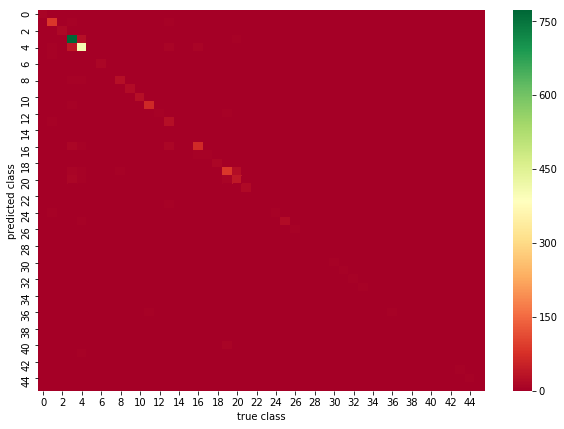

In [20]:
import seaborn as sn
import pandas as pd
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap=plt.cm.RdYlGn)#, annot=True)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.show()

In [21]:
print(metrics.classification_report(val_test, val_pred))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82        12
          1       0.65      0.83      0.73       105
          2       0.72      0.65      0.68        20
          3       0.89      0.95      0.92       813
          4       0.84      0.86      0.85       474
          5       0.00      0.00      0.00         5
          6       0.91      0.71      0.80        14
          7       0.50      0.33      0.40         3
          8       0.73      0.71      0.72        38
          9       0.90      0.76      0.83        25
         10       0.96      0.90      0.93        30
         11       0.69      0.78      0.73        83
         12       0.80      0.31      0.44        13
         13       0.39      0.73      0.50        37
         14       0.00      0.00      0.00         2
         15       0.50      0.11      0.18         9
         16       0.72      0.70      0.71        99
         17       1.00      0.42      0.59   

/home/dan/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/dan/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


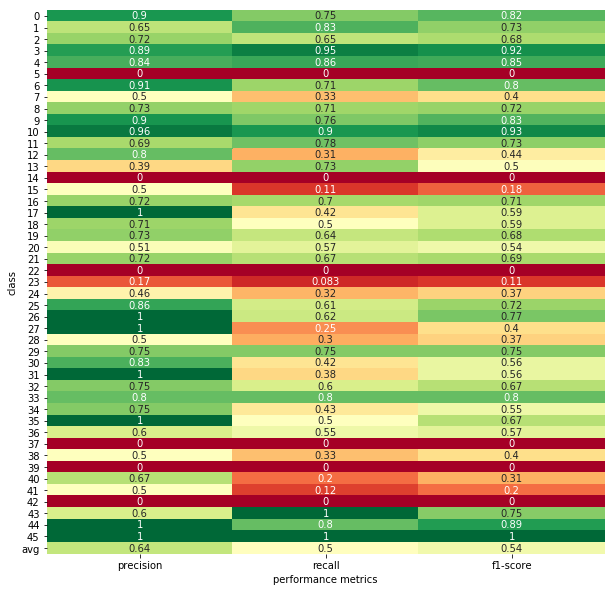

In [22]:
# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
plt.figure(figsize=(10, 10))

xticks = ['precision', 'recall', 'f1-score']#, 'support']
yticks = list(np.unique(val_test))
yticks += ['avg']

rep = np.array(metrics.precision_recall_fscore_support(val_test, val_pred)).T
avg = np.mean(rep, axis=0)

avg[-1] = np.sum(rep[:, -1])
rep = np.insert(rep, rep.shape[0], avg, axis=0)
rep = np.delete(rep, -1, axis=1)  #delete support column


sn.heatmap(rep,
           cmap=plt.cm.RdYlGn,
           annot=True, 
           cbar=False, 
           xticklabels=xticks, 
           yticklabels=yticks,
           ax=None)
plt.xlabel("performance metrics")
plt.ylabel("class")
plt.show()